In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

([<matplotlib.axis.XTick at 0xfbb0b90>,
 <a list of 11 Text xticklabel objects>)

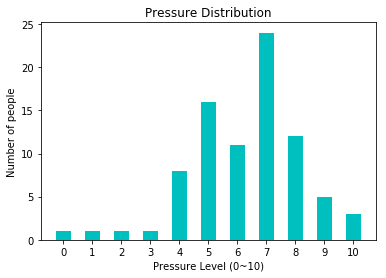

In [2]:
df = pd.read_csv("pressure.csv")
#print(df)
table1 = df.groupby("pressure").count()
x = list(table1.index)
y = list(table1["year"])
plt.bar(x,y,label=x,color="c",width=0.5)
plt.title("Pressure Distribution")
plt.xlabel("Pressure Level (0~10)")
plt.ylabel("Number of people")
plt.xticks(x)

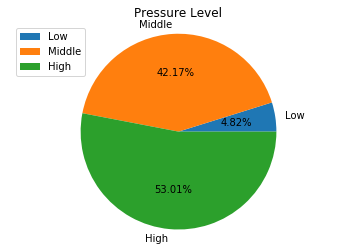

In [3]:
count_low = 0
count_middle = 0
count_high = 0
for i in range(len(df)):
    if(0 <= df["pressure"][i] <= 3):
        count_low+=1
    elif(4 <= df["pressure"][i] <= 6):
        count_middle+=1
    else:
        count_high+=1
answer2 = [count_low,count_middle,count_high]
label = ["Low","Middle","High"]
plt.pie(answer2,autopct="%.2f%%",labels=label)
plt.axis("equal")
plt.title("Pressure Level")
plt.legend(label,loc=2)

     High  Low  Middle
106     1    1       1
107     8    1       4
108    16    1       7
109     8    1      12
110    11    0      11


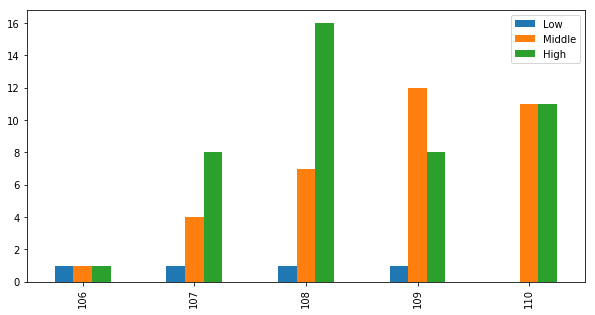

In [4]:
#<法一>
year = sorted(df["year"].unique())
countlow = []
countmiddle = []
counthigh = []
for y in year:
    count_low = 0
    count_middle = 0
    count_high = 0
    for i in range(len(df)):
        if(df["year"][i]==y):
            if(0 <= df["pressure"][i] <= 3):
                count_low+=1
            elif(4 <= df["pressure"][i] <= 6):
                count_middle+=1
            else:
                count_high+=1
        else:
            continue
    countlow.append(count_low)
    countmiddle.append(count_middle)
    counthigh.append(count_high)
mydata = {"Low":countlow,"Middle":countmiddle,"High":counthigh}
df2 = pd.DataFrame(mydata,index=year) #mtdata中Low,Middle,High的第一個數字會對到第一個index(106)，Low,Middle,High的第二個數字
#會對到第二個index(107)....Low,Middle,High的最後一個數字會對到最後一個index(110)
print(df2)
df2 = df2[["Low","Middle","High"]] #改變欄順序
df2.plot.bar(figsize=(10,5)) #figsize分別代表圖寬和高的長度
#plt.xticks([0,1,2,3,4],year,fontsize=20,rotation='horizontal') #改變橫軸座標位置及方向

     High  Low  Middle
106     1  1.0       1
107     8  1.0       4
108    16  1.0       7
109     8  1.0      12
110    11  NaN      11


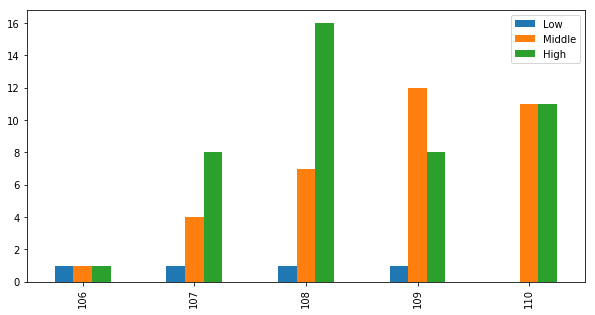

In [5]:
#<法二>
df3 = df.copy()
#df3 = df #不要用這個，會改到原本的df


#錯誤示範，請用下面的寫法，不然會產生warning
# for i in range(len(df3)):
#     if(0 <= df["pressure"][i] <= 3):
#         df3["pressure"][i] = "Low"
#     elif(4 <= df["pressure"][i] <= 6):
#         df3["pressure"][i] = "Middle"
#     else:
#         df3["pressure"][i] = "High"


#正確示範
for i in range(len(df3)):
    if(0 <= df.loc[i, "pressure"] <= 3):
        df3.loc[i, "pressure"] = "Low"
    elif(4 <= df.loc[i, "pressure"] <= 6):
        df3.loc[i, "pressure"] = "Middle"
    else:
        df3.loc[i, "pressure"] = "High"


#print(df3)


table3 = df3.groupby(["year","pressure"]).size() #series，非dataframe，可看各分類個數，但無法產生barplot
#print(table3)


g = df3.groupby("pressure").year #和df3.groupby("pressure")["year"]一樣，讓pressure為主要變數，算出各年級人數，因此把year欄位抓出
#對一個dictionary用pd.DataFrame時，key會當column變數，而我們又要產生像法一中df2一樣的表格，引此以pressure作為主要變數
#弄出{"High":各年級人數,"Middle":各年級人數,"Low":各年級人數}的dictionary
#無法直接印出g只能用下一行的方法印
#for k in g: print(k,type(k),"\n") #我們可發現g是由高、中、低三種tuple組成 


dff = pd.DataFrame({g_name: s.value_counts() for g_name,s in g }) #g_name:壓力種類、s:年級，總共三輪loop，因為三個tuple
#且每個tuple第一個是pressure第二個是一串年級

print(dff)
dff = dff[["Low","Middle","High"]] #改變欄順序
dff.plot.bar(figsize=(10,5))